# Dimensionality reduction using `scikit-learn`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing, model_selection as ms, \
                    manifold, decomposition as dec, cross_decomposition as cross_dec

from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
BOROUGHS_URL = 'https://files.datapress.com/london/dataset/london-borough-profiles/2017-01-26T18:50:00/london-borough-profiles.csv'

Read in the London Borough Profiles datasets.

In [3]:
boroughs = pd.read_csv(BOROUGHS_URL, encoding='iso-8859-1')

Filter the DataFrame so that only boroughs are included.

In [4]:
boroughs = boroughs[boroughs.Code.str.startswith('E09', na=False)]

Replace underscores with spaces in column names.

In [5]:
boroughs.columns = boroughs.columns.str.replace('_', ' ')

Select columns of interest.

In [6]:
boroughs = boroughs[[
    'Area name',
    'Population density (per hectare) 2017',
    'Proportion of population aged 0-15, 2015',
    'Proportion of population of working-age, 2015',
    'Proportion of population aged 65 and over, 2015',
    '% of resident population born abroad (2015)',
    'Unemployment rate (2015)',
    'Gross Annual Pay, (2016)',
    'Modelled Household median income estimates 2012/13',
    'Number of active businesses, 2015',
    'Two-year business survival rates (started in 2013)',
    'Crime rates per thousand population 2014/15',
    'Fires per thousand population (2014)',
    'Ambulance incidents per hundred population (2014)',
    'Median House Price, 2015',
    '% of area that is Greenspace, 2005',
    'Total carbon emissions (2014)',
    'Household Waste Recycling Rate, 2014/15',
    'Number of cars, (2011 Census)',
    'Number of cars per household, (2011 Census)',
    '% of adults who cycle at least once per month, 2014/15',
    'Average Public Transport Accessibility score, 2014',
    'Male life expectancy, (2012-14)',
    'Female life expectancy, (2012-14)',
    'Teenage conception rate (2014)',
    'Life satisfaction score 2011-14 (out of 10)',
    'Worthwhileness score 2011-14 (out of 10)',
    'Happiness score 2011-14 (out of 10)',
    'Anxiety score 2011-14 (out of 10)',
    'Childhood Obesity Prevalance (%) 2015/16',
    'People aged 17+ with diabetes (%)',
    'Mortality rate from causes considered preventable 2012/14'
]]

Set index.

In [7]:
boroughs.set_index('Area name', inplace=True)

Fix a couple of issues with data types.

In [8]:
boroughs[boroughs['Gross Annual Pay, (2016)'] == '.'] = None

In [9]:
boroughs['Modelled Household median income estimates 2012/13'] = \
    boroughs['Modelled Household median income estimates 2012/13'].str.replace("[^0-9]", "")

In [10]:
boroughs = boroughs.apply(pd.to_numeric)

Remove boroughs with missing values.

In [11]:
boroughs.dropna(inplace=True)

Extract information on 'feelings'.

In [12]:
col_idx = [
    'Life satisfaction score 2011-14 (out of 10)',
    'Worthwhileness score 2011-14 (out of 10)',
    'Happiness score 2011-14 (out of 10)',
    'Anxiety score 2011-14 (out of 10)'
]
feelings = boroughs[col_idx]
boroughs.drop(col_idx, axis=1, inplace=True)

## Multidimensional scaling (MDS)

Create a pipeline that scales the data and performs MDS.

In [13]:
smds = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('mds', manifold.MDS())
])

Two-dimensional projection ('embedding') of 'boroughs'

In [14]:
boroughs_mds = smds.fit_transform(boroughs)

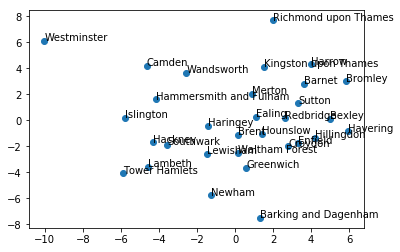

In [15]:
fig, ax = plt.subplots()
ax.scatter(boroughs_mds[:,0], boroughs_mds[:,1])
for i, name in enumerate(boroughs.index):
    ax.annotate(name, boroughs_mds[i,:])

## Principal component analysis (PCA)

Create a pipeline that scales the data and performs PCA.

In [16]:
spca = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('pca', dec.PCA())
])

Scores (projection of 'boroughs' on the PCs):

In [17]:
scores = spca.fit_transform(boroughs)

Scores plot:

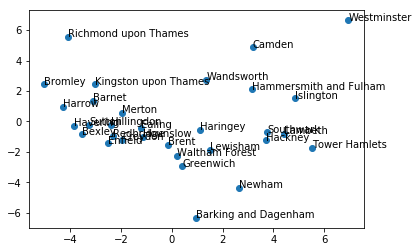

In [18]:
fig, ax = plt.subplots()
ax.scatter(scores[:,0], scores[:,1])
for i, name in enumerate(boroughs.index):
    ax.annotate(name, scores[i,0:2])

Loadings (coefficients defining the PCs):

In [19]:
spca.named_steps['pca'].components_

array([[  2.84933364e-01,  -1.34862823e-01,   2.77352532e-01,
         -2.55854213e-01,   1.47126165e-01,   1.01175342e-01,
          4.21473538e-02,  -2.49880943e-02,   1.52651966e-01,
         -2.10020074e-01,   2.54607227e-01,   2.14198917e-01,
          1.75251092e-01,   1.72468631e-01,  -2.28077822e-01,
          1.06632567e-01,  -2.24436678e-01,  -2.47325014e-01,
         -2.95707169e-01,   1.02668055e-01,   2.83505734e-01,
         -1.64285412e-01,  -6.91922174e-02,   1.05883565e-01,
          1.73551127e-01,  -8.89982579e-02,   2.25966081e-01],
       [  1.66894539e-02,  -2.72381681e-01,   5.50980263e-02,
          1.27711979e-01,  -4.15163367e-02,  -1.65413432e-01,
          3.37448609e-01,   3.46756949e-01,   2.39111479e-01,
          8.32748543e-02,   1.24451009e-01,  -2.46193620e-02,
          7.31985818e-02,   2.93407184e-01,   7.54393875e-02,
          1.08135625e-01,   3.79535409e-02,  -6.52312598e-03,
          5.93878380e-03,   1.95906943e-01,   1.23869938e-01,
       

Explained variance:

In [20]:
spca.named_steps['pca'].explained_variance_

array([  1.09024409e+01,   7.30292041e+00,   3.36527832e+00,
         1.91630185e+00,   9.29703402e-01,   7.65244800e-01,
         6.25094093e-01,   5.81887746e-01,   3.18563734e-01,
         2.47482811e-01,   1.99790285e-01,   1.44998767e-01,
         1.30865568e-01,   1.13967249e-01,   9.19209126e-02,
         7.73137318e-02,   6.74566409e-02,   4.06029789e-02,
         2.05738993e-02,   1.96203930e-02,   1.38116987e-02,
         9.60123187e-03,   6.63000321e-03,   4.47356701e-03,
         2.14376438e-03,   1.30575600e-03,   5.47721450e-06])

In [21]:
np.cumsum(spca.named_steps['pca'].explained_variance_)

array([ 10.90244091,  18.20536132,  21.57063964,  23.48694149,
        24.41664489,  25.18188969,  25.80698378,  26.38887153,
        26.70743526,  26.95491808,  27.15470836,  27.29970713,
        27.4305727 ,  27.54453995,  27.63646086,  27.71377459,
        27.78123123,  27.82183421,  27.84240811,  27.8620285 ,
        27.8758402 ,  27.88544143,  27.89207144,  27.896545  ,
        27.89868877,  27.89999452,  27.9       ])

Explained variance ratio:

In [22]:
spca.named_steps['pca'].explained_variance_ratio_

array([  3.90768491e-01,   2.61753420e-01,   1.20619295e-01,
         6.86846542e-02,   3.33227026e-02,   2.74281290e-02,
         2.24048062e-02,   2.08561916e-02,   1.14180550e-02,
         8.87035165e-03,   7.16094212e-03,   5.19708843e-03,
         4.69052214e-03,   4.08484764e-03,   3.29465637e-03,
         2.77110150e-03,   2.41780075e-03,   1.45530390e-03,
         7.37415746e-04,   7.03239893e-04,   4.95042964e-04,
         3.44130175e-04,   2.37634524e-04,   1.60342904e-04,
         7.68374328e-05,   4.68012902e-05,   1.96315932e-07])

In [23]:
np.cumsum(spca.named_steps['pca'].explained_variance_ratio_)

array([ 0.39076849,  0.65252191,  0.77314121,  0.84182586,  0.87514856,
        0.90257669,  0.9249815 ,  0.94583769,  0.95725574,  0.9661261 ,
        0.97328704,  0.97848413,  0.98317465,  0.9872595 ,  0.99055415,
        0.99332525,  0.99574305,  0.99719836,  0.99793577,  0.99863901,
        0.99913406,  0.99947819,  0.99971582,  0.99987616,  0.999953  ,
        0.9999998 ,  1.        ])

Scree plot:

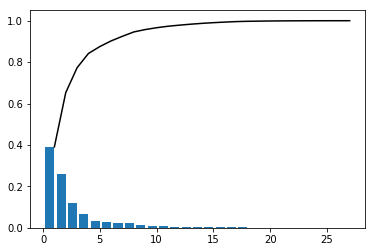

In [24]:
plt.bar(np.arange(1, spca.named_steps['pca'].n_components_ + 1) - 0.4,
        spca.named_steps['pca'].explained_variance_ratio_)
cum_evr = np.cumsum(spca.named_steps['pca'].explained_variance_ratio_)
plt.plot(np.arange(1, spca.named_steps['pca'].n_components_ + 1), cum_evr, color='black')

## Partial least squares (PLS) regression

Create a pipeline that scales the data and performs PLS regression.

In [25]:
spls = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('pls', cross_dec.PLSRegression(scale=False))
])

Train a PLS regression model with three components.

In [26]:
spls.set_params(
    pls__n_components=3
)
spls.fit(boroughs, feelings)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pls', PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06))])

Define folds for cross-validation.

In [27]:
three_fold_cv = ms.KFold(n_splits=3, shuffle=True)

Compute average MSE across folds.

In [28]:
mses = ms.cross_val_score(spls, boroughs, feelings, scoring='neg_mean_squared_error', cv=three_fold_cv)
np.mean(-mses)

0.022694771181408446

Determine 'optimal' number of components.

In [29]:
gs = ms.GridSearchCV(
    estimator=spls,
    param_grid={
        'pls__n_components': np.arange(1, 10)
    },
    scoring='neg_mean_squared_error',
    cv=three_fold_cv
)
gs.fit(boroughs, feelings)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pls', PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pls__n_components': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
-gs.best_score_

0.027230392277316804

In [31]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pls', PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06))])

Plot number of components against MSE.

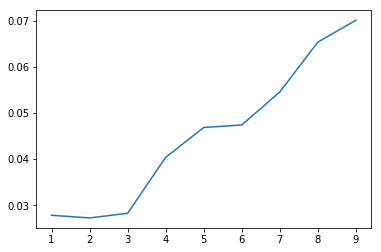

In [32]:
plt.plot(np.arange(1, 10), -gs.cv_results_['mean_test_score'])